# DB-Scan

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist, squareform
import numpy as np
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score

## Cyclist Dataset

In [3]:
cyclists_df = pd.read_csv('../dataset/cyclists_clustering.csv')

In [4]:
column_to_drop = ["cyclist_win", "cyclist_experience", "avg_position", "best_position", "birth_year", 
                  "performance_entropy", "min_relative_position", "cyclist_win_ratio", "weighted_podiums", "best_position_std", "avg_performance_vs_startlist"]

# drop the unnecessary columns for the clustering and keep only the numerical columns
numerical_cyclists_df = cyclists_df.drop(columns=column_to_drop).select_dtypes(include=['float64', 'int64'])
numerical_cyclists_df

,avg_relative_position,relative_position_std,career_level
0,0.456286,0.243635,0.918577
1,0.630686,0.205735,-0.564982
2,0.557360,0.219011,-0.112376
3,0.464642,0.238795,-0.494242
4,0.589817,0.238517,-0.141179
...,...,...,...
4306,0.510309,0.340690,-0.487705
4307,0.637519,0.215697,-0.585403
4308,0.697735,0.150866,-0.593267
4309,0.413682,0.238513,-0.293226


In [5]:
scaler = StandardScaler()
scaler = scaler.fit(numerical_cyclists_df)
X = scaler.transform(numerical_cyclists_df)

In [6]:
dist = pdist(X, 'euclidean') # pair-wise distances
dist = squareform(dist) # distance matrix

In [7]:
k = 5
kth_distances = list()
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])

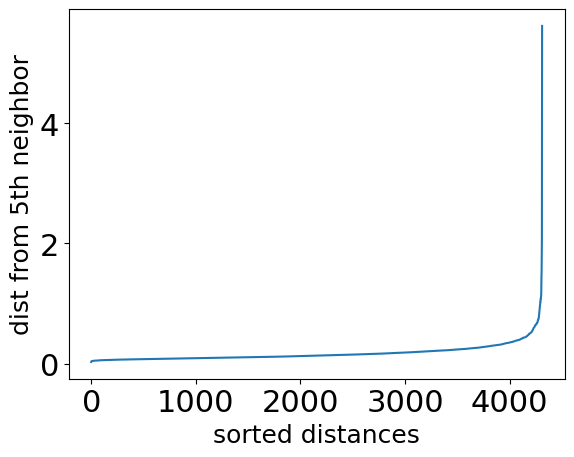

In [8]:
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from %sth neighbor' % k, fontsize=18)
plt.xlabel('sorted distances', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

The elbow value is at index: 4298


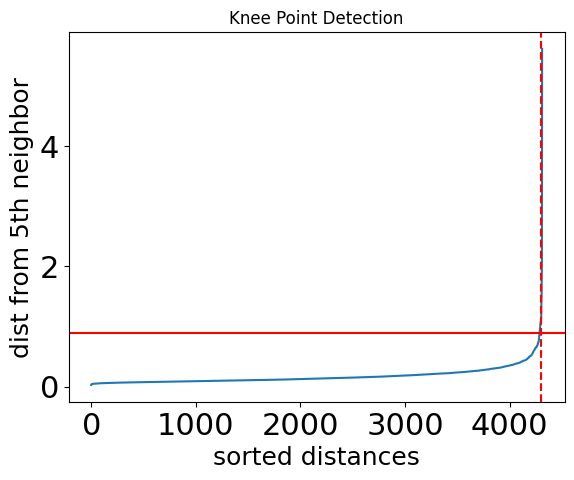

In [12]:
kneedle = KneeLocator(np.arange(1, len(kth_distances) + 1), np.sort(kth_distances), curve='convex', direction='increasing')
elbow_value = kneedle.elbow
print(f'The elbow value is at index: {elbow_value}')

# Plot the kth distances and mark the elbow point
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.axvline(x=elbow_value - 1, color='r', linestyle='--')
plt.axhline(y=0.9, color='r', linestyle='-')
plt.ylabel('dist from %sth neighbor' % k, fontsize=18)
plt.xlabel('sorted distances', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.title('Knee Point Detection')
plt.show()

In [19]:
min_samples = [20, 50, 150, 200]
epsilon_candidates = np.linspace(0.5, 1, 10)


In [20]:
results = []
for eps in epsilon_candidates:
    for min_sample in min_samples:
        dbscan = DBSCAN(eps=eps, min_samples=min_sample)
        dbscan.fit(X)
        n_clusters = len(np.unique(dbscan.labels_))
        silhouette = silhouette_score(X, dbscan.labels_)
        DBscore = davies_bouldin_score(X, dbscan.labels_)
        results.append({'eps': eps, 'min_samples': min_sample, 'n_clusters': n_clusters, 'silhouette': silhouette, 'DBscore': DBscore})
        

In [21]:
results_df = pd.DataFrame(results).sort_values(by='silhouette', ascending=False)
results_df

,eps,min_samples,n_clusters,silhouette,DBscore
36,1.000000,20,2,0.677906,0.805759
32,0.944444,20,2,0.667091,0.819350
28,0.888889,20,2,0.666175,0.785902
24,0.833333,20,2,0.653605,0.821536
37,1.000000,50,2,0.649267,0.752683
33,0.944444,50,2,0.636290,0.743407
20,0.777778,20,2,0.632300,0.862997
29,0.888889,50,2,0.621020,0.744791
16,0.722222,20,2,0.620470,0.846861
12,0.666667,20,2,0.604209,0.832143


In [16]:
from sklearn.decomposition import PCA

eps = results_df.iloc[0]['eps']
min_samples = int(results_df.iloc[0]['min_samples'])

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan.fit(X)

DBSCAN(eps=np.float64(0.9), min_samples=20)

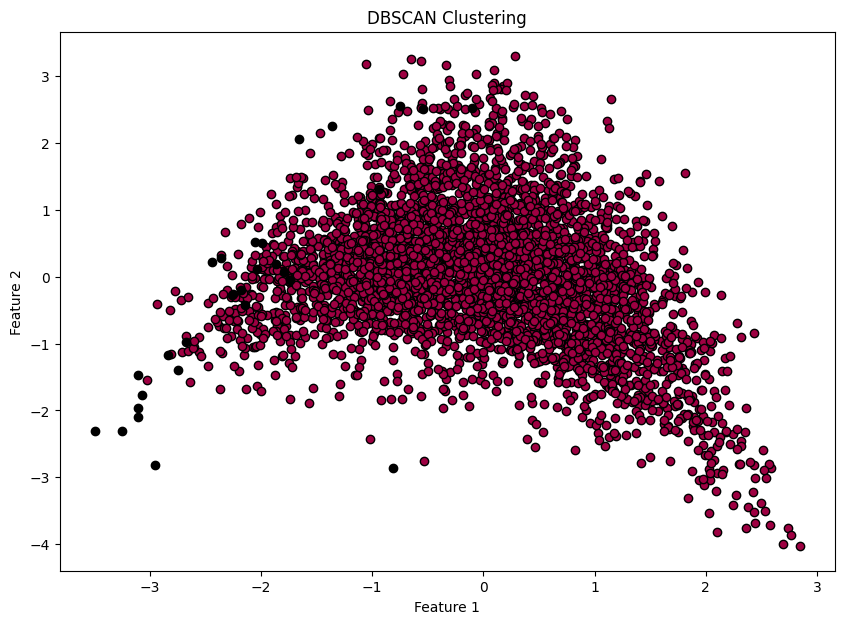

In [17]:
# Create a scatter plot of the clusters
plt.figure(figsize=(10, 7))

# Plot the points with different colors for different clusters
unique_labels = set(dbscan.labels_)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (dbscan.labels_ == k)

    xy = X[class_member_mask & class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [18]:
unique_labels, counts = np.unique(dbscan.labels_, return_counts=True)
cluster_counts = dict(zip(unique_labels, counts))
print(cluster_counts)

{np.int64(-1): np.int64(29), np.int64(0): np.int64(4282)}
